In [1]:
!pip install folium


In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

In [3]:
cdata=pd.read_csv('train.csv')

In [4]:
#fillin the missing value 0,select numeric variables
cdata.fillna(0,inplace=True)
cla =cdata[cdata.city == "LA"]
raw_la= pd.DataFrame(cla, columns=['log_price', 'accommodates','bathrooms','number_of_reviews','review_scores_rating','bedrooms','beds','latitude','longitude'])

In [5]:
#categorize log price with average log price
raw_la.log_price.mean()

4.72049630665993

In [6]:
#categorize log price into 2 groups:0-low and 1-high
raw_la.loc[raw_la["log_price"] <4.72,"log_price"] = 0
raw_la.loc[raw_la["log_price"] >=4.72,"log_price"] = 1

### Correlation Heatmap 

<AxesSubplot:>

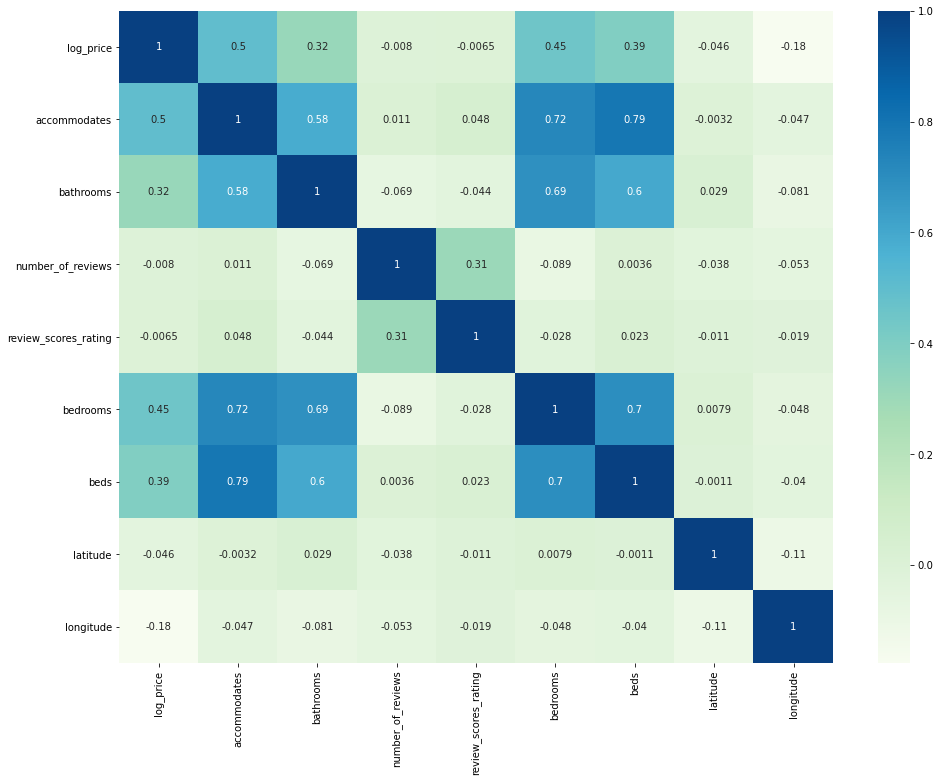

In [7]:
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
sns.heatmap(raw_la.corr(),cmap='GnBu',annot=True)

In [8]:
#Cross validation using K-fold
from sklearn.model_selection import KFold, cross_val_score

#Split the data into 10 and shuflles data before kfold splits the data
kfold = KFold(n_splits=10, shuffle = True)

In [9]:
#logisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [10]:
#Set log_price as dependent variable, all others are independent variables
rawlaLR = raw_la.copy()
X_rawlr = rawlaLR.drop(['log_price'], axis=1)
y_rawlr = rawlaLR.log_price
# Splitting data to train and test
from sklearn.model_selection import train_test_split
X_raw_LRtrain, X_raw_LRtest, y_raw_LRtrain, y_raw_LRtest = train_test_split(X_rawlr,y_rawlr,train_size=0.7,random_state=1234)

In [11]:
#regression result
import warnings
warnings.filterwarnings("ignore") 
from sklearn.model_selection import GridSearchCV
logreg_raw = LogisticRegression()

logreg_raw.fit(X_raw_LRtrain, y_raw_LRtrain)
est_raw = sm.Logit(y_raw_LRtrain, X_raw_LRtrain.astype(float)).fit()
print(est_raw.summary())

Optimization terminated successfully.
         Current function value: 0.502679
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              log_price   No. Observations:                15717
Model:                          Logit   Df Residuals:                    15709
Method:                           MLE   Df Model:                            7
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                  0.2701
Time:                        16:32:32   Log-Likelihood:                -7900.6
converged:                       True   LL-Null:                       -10825.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
accommodates             0.6736      0.021     31.691      0.000       0.632       0.715

### P>|t| is 0 which is means there are statistically significant at alpha level 0.05.
### From our results, we see that
### The p-value of 0.000 for accommodates,bathrooms,review_score_rating,bedrooms,beds,latitude,longitude implies that log_price is statistically significant (using p < 0.05 as a rejection rule).
### The p-value of 0.076 for number_of_reviews implies that log_price is statistically no significant (using p > 0.05 as a rejection rule).
### The R-squared value of 0.603 indicates that around 60% of the variation in log_price is explained by independent variables. 


Accuracy of logistic regression  classifier on test set: 0.78
Confusion Matrix
[[3301  428]
 [1068 1939]]
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82      3729
         1.0       0.82      0.64      0.72      3007

    accuracy                           0.78      6736
   macro avg       0.79      0.77      0.77      6736
weighted avg       0.78      0.78      0.77      6736



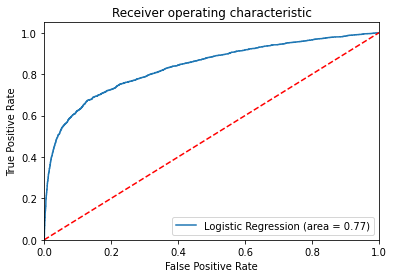

In [12]:
#accuracy of logistic regression
y_predition_raw = logreg_raw.predict(X_raw_LRtest)
print('Accuracy of logistic regression  classifier on test set: {:.2f}'.format(logreg_raw.score(X_raw_LRtest, y_raw_LRtest)))
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_raw = confusion_matrix(y_raw_LRtest, y_predition_raw)
print('Confusion Matrix')
print(confusion_matrix_raw)
#report
print(classification_report(y_raw_LRtest,y_predition_raw))
#ROC
logit_roc_auc_raw = roc_auc_score(y_raw_LRtest, logreg_raw.predict(X_raw_LRtest))
fpr, tpr, thresholds = roc_curve(y_raw_LRtest, logreg_raw.predict_proba(X_raw_LRtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_raw)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [13]:
#K-fold validation

score = cross_val_score(logreg_raw, X_rawlr, y_rawlr, cv=kfold, scoring='accuracy')
print("Results of 10-fold validation:",score)
print()
print("Mean of 10-fold validation:", score.mean())

Results of 10-fold validation: [0.77738201 0.77960819 0.78940338 0.77282851 0.76124722 0.76926503
 0.7688196  0.76124722 0.78040089 0.77951002]

Mean of 10-fold validation: 0.7739712074125344


In [14]:
raw_la1= pd.DataFrame(raw_la, columns=['log_price', 'accommodates','review_scores_rating','bedrooms','beds','latitude','longitude'])

In [15]:
#Set log_price as dependent variable, all others are independent variables
rawlaLR_1 = raw_la1.copy()
X_rawlr1 = rawlaLR_1.drop(['log_price'], axis=1)
y_rawlr1 = rawlaLR_1.log_price
# Splitting data to train and test
from sklearn.model_selection import train_test_split
X_raw_LRtrain1, X_raw_LRtest1, y_raw_LRtrain1, y_raw_LRtest1 = train_test_split(X_rawlr1,y_rawlr1,train_size=0.7,random_state=1234)

In [16]:
#regression result
import warnings
warnings.filterwarnings("ignore") 
from sklearn.model_selection import GridSearchCV
logreg_raw = LogisticRegression()

logreg_raw.fit(X_raw_LRtrain1, y_raw_LRtrain1)
est1_raw = sm.Logit(y_raw_LRtrain1, X_raw_LRtrain1.astype(float)).fit()
print(est1_raw.summary())

Optimization terminated successfully.
         Current function value: 0.502783
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              log_price   No. Observations:                15717
Model:                          Logit   Df Residuals:                    15711
Method:                           MLE   Df Model:                            5
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                  0.2700
Time:                        16:32:34   Log-Likelihood:                -7902.2
converged:                       True   LL-Null:                       -10825.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
accommodates             0.6748      0.021     31.780      0.000       0.633       0.716

Accuracy of logistic regression  classifier on test set: 0.78
Confusion Matrix
[[3298  431]
 [1063 1944]]
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82      3729
         1.0       0.82      0.65      0.72      3007

    accuracy                           0.78      6736
   macro avg       0.79      0.77      0.77      6736
weighted avg       0.78      0.78      0.77      6736



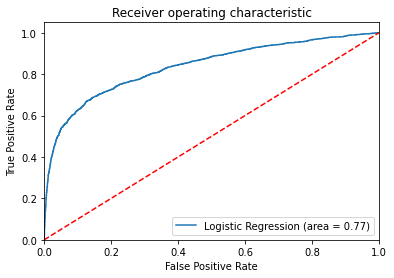

In [17]:
#accuracy of logistic regression
y_predition_raw1 = logreg_raw.predict(X_raw_LRtest1)
print('Accuracy of logistic regression  classifier on test set: {:.2f}'.format(logreg_raw.score(X_raw_LRtest1, y_raw_LRtest1)))
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_raw1 = confusion_matrix(y_raw_LRtest1, y_predition_raw1)
print('Confusion Matrix')
print(confusion_matrix_raw1)
#report
print(classification_report(y_raw_LRtest1,y_predition_raw1))
#ROC
logit_roc_auc_raw1 = roc_auc_score(y_raw_LRtest1, logreg_raw.predict(X_raw_LRtest1))
fpr, tpr, thresholds = roc_curve(y_raw_LRtest1, logreg_raw.predict_proba(X_raw_LRtest1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_raw)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [18]:
#K-fold validation

score2 = cross_val_score(logreg_raw, X_rawlr1, y_rawlr1, cv=kfold, scoring='accuracy')
print("Results of 10-fold validation:",score2)
print()
print("Mean of 10-fold validation:", score2.mean())

Results of 10-fold validation: [0.76892253 0.77515583 0.76268923 0.77104677 0.77594655 0.77639198
 0.7688196  0.76570156 0.7844098  0.78129176]

Mean of 10-fold validation: 0.7730375604638386


# Naive Bayes

In [19]:

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [20]:
raw_la.mean()

log_price                 0.451076
accommodates              3.407251
bathrooms                 1.346568
number_of_reviews        21.304948
review_scores_rating     72.183583
bedrooms                  1.333497
beds                      1.860642
latitude                 34.056477
longitude              -118.333835
dtype: float64

In [21]:
lanb_bench = raw_la.copy()
lanb_bench.loc[lanb_bench["accommodates"] <3.41,"accommodates"] = 0
lanb_bench.loc[lanb_bench["accommodates"] >=3.41,"accommodates"] = 1

lanb_bench.loc[lanb_bench["bathrooms"] <1.35,"bathrooms"] = 0
lanb_bench.loc[lanb_bench["bathrooms"] >=1.35,"bathrooms"] = 1

lanb_bench.loc[lanb_bench["number_of_reviews"] <21.30,"number_of_reviews"] = 0
lanb_bench.loc[lanb_bench["number_of_reviews"] >=21.30,"number_of_reviews"] = 1

lanb_bench.loc[lanb_bench["review_scores_rating"] <72.18,"review_scores_rating"] = 0
lanb_bench.loc[lanb_bench["review_scores_rating"] >=72.18,"review_scores_rating"] = 1

lanb_bench.loc[lanb_bench["bedrooms"] <1.33,"bedrooms"] = 0
lanb_bench.loc[lanb_bench["bedrooms"] >=1.33,"bedrooms"] = 1

lanb_bench.loc[lanb_bench["beds"] <1.86,"beds"] = 0
lanb_bench.loc[lanb_bench["beds"] >=1.86,"beds"] = 1

lanb_bench.loc[lanb_bench["latitude"] <34.06,"latitude"] = 0
lanb_bench.loc[lanb_bench["latitude"] >=34.06,"latitude"] = 1

lanb_bench.loc[abs(lanb_bench["longitude"]) < abs(lanb_bench.longitude.mean()),"longitude"] = 0
lanb_bench.loc[abs(lanb_bench["longitude"]) >= abs(lanb_bench.longitude.mean()),"longitude"] = 1


In [22]:
lanb_bench.longitude.value_counts()

1.0    12763
0.0     9690
Name: longitude, dtype: int64

In [23]:
#Set log_price as dependent variable, all others are independent variables
X_feature_raw =lanb_bench.drop(['log_price'],axis =1).values
X_target_raw = lanb_bench.loc[:, 'log_price'].values

accuracy score: 0.7541567695961995
[[3159  538]
 [1118 1921]]
              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79      3697
         1.0       0.78      0.63      0.70      3039

    accuracy                           0.75      6736
   macro avg       0.76      0.74      0.75      6736
weighted avg       0.76      0.75      0.75      6736



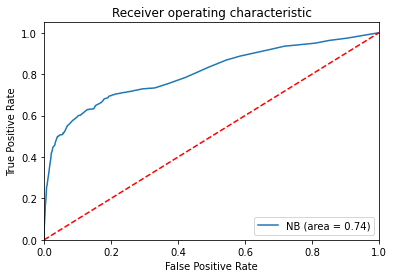

In [24]:
#standarlize Xfeature (allvariable except log_price)
# scaler = StandardScaler() 
# scaler.fit(X_feature_raw)  
# X_feature_raw= scaler.transform(X_feature_raw)   
feature_train_raw, feature_test_raw, target_train_raw, target_test_raw = train_test_split(X_feature_raw, X_target_raw, test_size=0.3,random_state=0)
 
NB=BernoulliNB()
NB.fit(feature_train_raw,target_train_raw)
predict_results_raw=NB.predict(feature_test_raw)
print("accuracy score:", accuracy_score(predict_results_raw, target_test_raw))
 
conf_mat_raw = confusion_matrix(target_test_raw, predict_results_raw)
 
print(conf_mat_raw)
 
print(classification_report(target_test_raw, predict_results_raw))
#ROC
nb_roc_auc_raw = roc_auc_score(target_test_raw, NB.predict(feature_test_raw))
fpr, tpr, thresholds = roc_curve(target_test_raw, NB.predict_proba(feature_test_raw)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % nb_roc_auc_raw)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

In [25]:
#K-fold validation

score3 = cross_val_score(NB, X_feature_raw, X_target_raw, cv=kfold, scoring='accuracy')
print("Results of 10-fold validation:",score3)
print()
print("Mean of 10-fold validation:", score3.mean())

Results of 10-fold validation: [0.7524488  0.7586821  0.76268923 0.76703786 0.7714922  0.74922049
 0.7518931  0.7376392  0.76124722 0.75946548]

Mean of 10-fold validation: 0.7571815670323089


# Random Forest

In [26]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

[Text(558.0, 978.48, 'review_scores_rating <= 95.5\ngini = 0.496\nsamples = 9956\nvalue = [8545, 7172]'),
 Text(279.0, 761.0400000000001, 'longitude <= -118.338\ngini = 0.493\nsamples = 5562\nvalue = [4900, 3887]'),
 Text(139.5, 543.6, 'bedrooms <= 1.5\ngini = 0.499\nsamples = 3040\nvalue = [2273, 2531]'),
 Text(69.75, 326.1600000000001, 'accommodates <= 2.5\ngini = 0.455\nsamples = 2102\nvalue = [2171, 1173]'),
 Text(34.875, 108.72000000000003, 'gini = 0.395\nsamples = 1462\nvalue = [1708, 634]'),
 Text(104.625, 108.72000000000003, 'gini = 0.497\nsamples = 640\nvalue = [463, 539]'),
 Text(209.25, 326.1600000000001, 'accommodates <= 2.5\ngini = 0.13\nsamples = 938\nvalue = [102, 1358]'),
 Text(174.375, 108.72000000000003, 'gini = 0.498\nsamples = 27\nvalue = [25, 22]'),
 Text(244.125, 108.72000000000003, 'gini = 0.103\nsamples = 911\nvalue = [77, 1336]'),
 Text(418.5, 543.6, 'bedrooms <= 1.5\ngini = 0.449\nsamples = 2522\nvalue = [2627, 1356]'),
 Text(348.75, 326.1600000000001, 'number

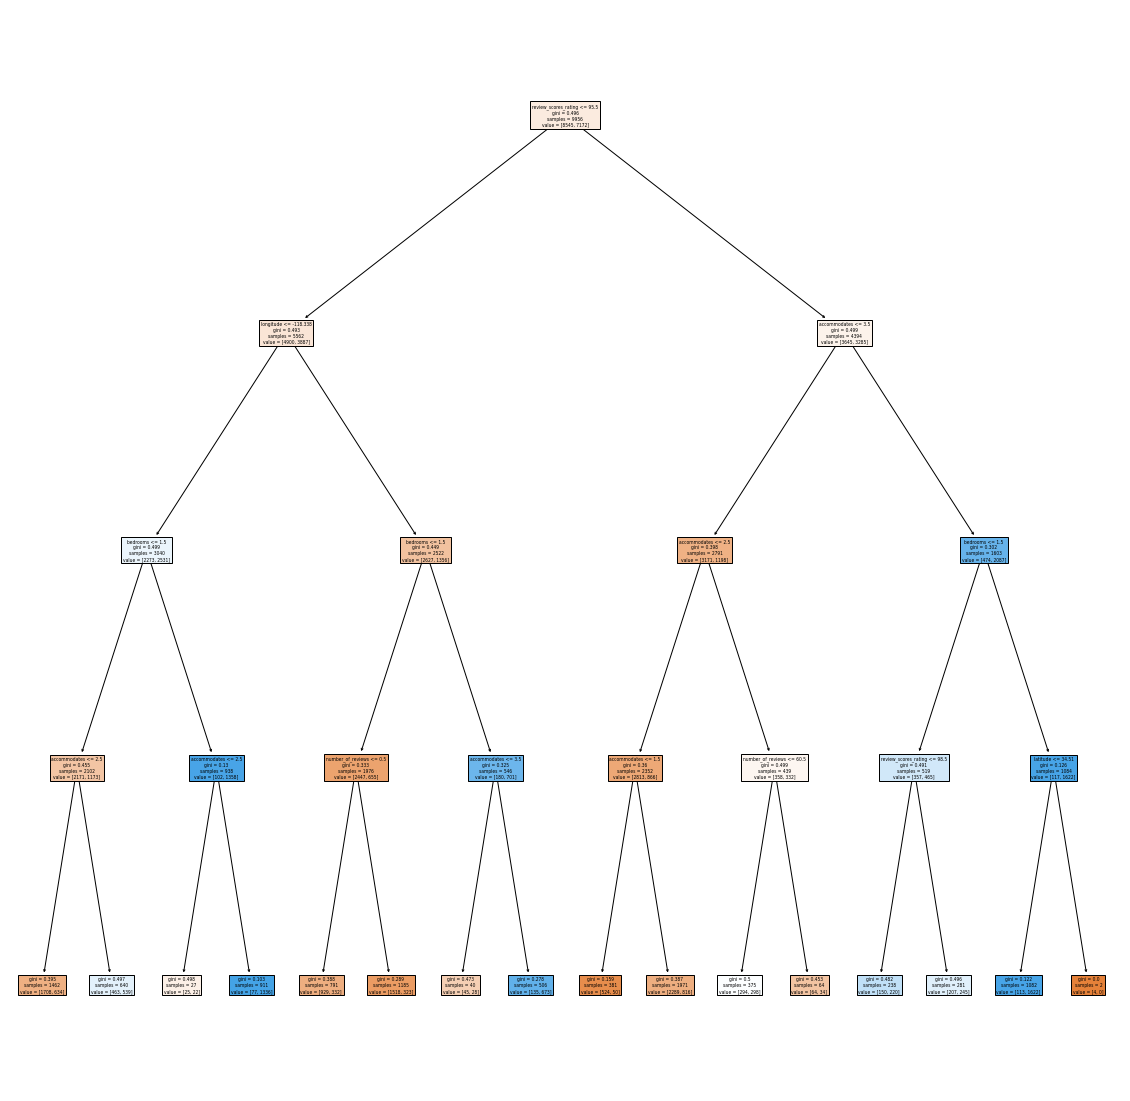

In [27]:
rawrf = raw_la.copy()
X3_raw = rawrf.drop(['log_price'], axis=1)
y3_raw = rawrf.log_price
# Splitting data to train and test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_raw,y3_raw,train_size=0.7,random_state=1234)
 
forest_raw = RandomForestClassifier(n_estimators = 10, random_state = 0, max_depth=4)
Random_Forest_raw= forest_raw.fit(X3_train,y3_train)
 
rfpred_raw = forest_raw.predict(X3_test)
#Random Forest 
fig_raw = plt.figure(figsize =(20,20))
tree.plot_tree(Random_Forest_raw.estimators_[1], feature_names=list(X3_raw),filled=True)

accuracy score: 0.7853325415676959
[[3341  388]
 [1058 1949]]
              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82      3729
         1.0       0.83      0.65      0.73      3007

    accuracy                           0.79      6736
   macro avg       0.80      0.77      0.78      6736
weighted avg       0.79      0.79      0.78      6736



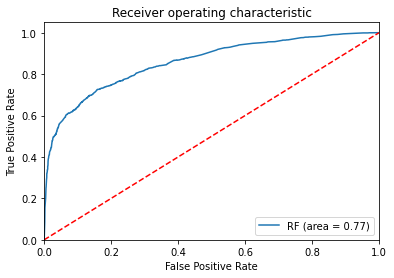

In [28]:
#ROC FOR RF
print("accuracy score:", accuracy_score(rfpred_raw, y3_test))
 
conf_mat_rawrf = confusion_matrix(y3_test, rfpred_raw)
 
print(conf_mat_rawrf)
 
print(classification_report(y3_test, rfpred_raw))

#ROC
rf_roc_auc_raw = roc_auc_score(y3_test, forest_raw.predict(X3_test))
fpr, tpr, thresholds = roc_curve(y3_test, forest_raw.predict_proba(X3_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % rf_roc_auc_raw)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [29]:
#K-fold validation

score4 = cross_val_score(forest_raw, X3_raw, y3_raw, cv=kfold, scoring='accuracy')
print("Results of 10-fold validation:",score4)
print()
print("Mean of 10-fold validation:", score4.mean())

Results of 10-fold validation: [0.77693678 0.78317008 0.78539626 0.7857461  0.78084633 0.77327394
 0.78930958 0.75412027 0.77550111 0.78262806]

Mean of 10-fold validation: 0.7786928506406837


# KNN

In [30]:
#import packages
#from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler() 
scaler.fit(X_rawlr)  
x_feature= scaler.transform(X_rawlr)   
kfeature_train, kfeature_test, ktarget_train, ktarget_test = train_test_split(X_rawlr, y_rawlr, test_size=0.3,random_state=0)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(kfeature_train,ktarget_train)

knn_grid.best_params_, knn_grid.best_score_


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    9.0s finished


({'knn__n_neighbors': 8}, 0.7954437301196001)

In [33]:
knn_raw=KNeighborsClassifier(n_neighbors=8)
knn_raw.fit(kfeature_train,ktarget_train)
knn_pred_raw = knn_raw.predict(kfeature_test)
print(knn_pred_raw)


[0. 0. 0. ... 1. 0. 0.]


accuracy score: 0.7519299287410927
[[3230  467]
 [1204 1835]]
              precision    recall  f1-score   support

         0.0       0.73      0.87      0.79      3697
         1.0       0.80      0.60      0.69      3039

    accuracy                           0.75      6736
   macro avg       0.76      0.74      0.74      6736
weighted avg       0.76      0.75      0.75      6736



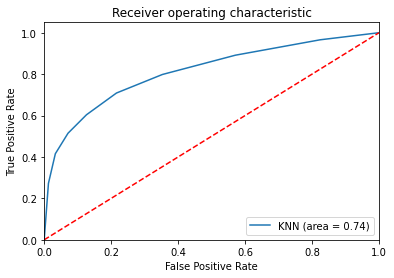

In [34]:
print("accuracy score:", accuracy_score(ktarget_test , knn_pred_raw))

conf_matraw = confusion_matrix(ktarget_test, knn_pred_raw)
print(conf_matraw)

print(classification_report(ktarget_test, knn_pred_raw))

#ROC
knn_roc_auc_raw = roc_auc_score(ktarget_test, knn_raw.predict(kfeature_test))
fpr, tpr, thresholds = roc_curve(ktarget_test, knn_raw.predict_proba(kfeature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc_raw)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [35]:
#K-fold validation

score5 = cross_val_score(knn_raw, X_rawlr, y_rawlr, cv=kfold, scoring='accuracy')
print("Results of 10-fold validation:",score5)
print()
print("Mean of 10-fold validation:", score5.mean())

Results of 10-fold validation: [0.75823687 0.77827248 0.76536064 0.75100223 0.7688196  0.7701559
 0.76837416 0.76570156 0.76080178 0.75946548]

Mean of 10-fold validation: 0.7646190703790158


## Processing

## Heat map

In [36]:
#delete missing data  why we choose these variables
c = cdata.dropna()
d = pd.DataFrame(c, columns=['log_price','bathrooms','accommodates','number_of_reviews','review_scores_rating','bed_type','bedrooms','beds','city','room_type','cancellation_policy','host_has_profile_pic','host_identity_verified', 'host_response_rate','instant_bookable','cleaning_fee', 'latitude', 'longitude'])
#d = pd.DataFrame(c, columns=['log_price', 'accommodates','number_of_reviews','review_scores_rating','bedrooms', 'beds','cancellation_policy','room_type','city'])

In [37]:
#Selected City
la = d[d.city =='LA']
la

,log_price,bathrooms,accommodates,number_of_reviews,review_scores_rating,bed_type,bedrooms,beds,city,room_type,cancellation_policy,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,cleaning_fee,latitude,longitude
6,4.418841,1.0,3,15,97.0,Real Bed,1.0,1.0,LA,Entire home/apt,moderate,t,f,100%,t,True,33.980454,-118.462821
7,4.787492,1.0,2,9,93.0,Real Bed,1.0,1.0,LA,Entire home/apt,moderate,t,t,100%,f,True,34.046737,-118.260439
9,3.583519,1.0,2,2,90.0,Real Bed,1.0,1.0,LA,Private room,moderate,t,f,100%,t,True,33.992563,-117.895997
11,5.010635,1.5,4,29,97.0,Real Bed,2.0,2.0,LA,Entire home/apt,strict,t,t,100%,f,True,33.875862,-118.403293
12,4.248495,1.0,2,0,0.0,Real Bed,1.0,1.0,LA,Private room,flexible,t,f,0,f,True,33.813228,-118.389434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74101,4.584967,1.0,1,4,90.0,Real Bed,1.0,1.0,LA,Private room,moderate,t,t,100%,f,True,34.020021,-118.498239
74102,4.110874,3.0,10,1,80.0,Real Bed,1.0,10.0,LA,Shared room,flexible,t,f,100%,f,False,34.199671,-118.618070
74105,4.248495,1.0,2,36,91.0,Real Bed,1.0,1.0,LA,Private room,moderate,t,t,75%,f,True,34.092640,-118.343921
74107,5.043425,2.0,4,16,93.0,Real Bed,2.0,4.0,LA,Entire home/apt,moderate,t,f,100%,f,True,33.871549,-118.396053


In [38]:
# # Since there are so many categoreis under property type, it is not possible to categorize into 0 and 1 
# pro_type = list(la.property_type.drop_duplicates())
# pro_1 =pro_type[0:11]
# pro_0 =pro_type[11:]
# pro_1
# for pro in pro_1:
#     pro_type.remove(pro)
# pro_type

In [39]:
la_c =la.copy()
la_c

,log_price,bathrooms,accommodates,number_of_reviews,review_scores_rating,bed_type,bedrooms,beds,city,room_type,cancellation_policy,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,cleaning_fee,latitude,longitude
6,4.418841,1.0,3,15,97.0,Real Bed,1.0,1.0,LA,Entire home/apt,moderate,t,f,100%,t,True,33.980454,-118.462821
7,4.787492,1.0,2,9,93.0,Real Bed,1.0,1.0,LA,Entire home/apt,moderate,t,t,100%,f,True,34.046737,-118.260439
9,3.583519,1.0,2,2,90.0,Real Bed,1.0,1.0,LA,Private room,moderate,t,f,100%,t,True,33.992563,-117.895997
11,5.010635,1.5,4,29,97.0,Real Bed,2.0,2.0,LA,Entire home/apt,strict,t,t,100%,f,True,33.875862,-118.403293
12,4.248495,1.0,2,0,0.0,Real Bed,1.0,1.0,LA,Private room,flexible,t,f,0,f,True,33.813228,-118.389434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74101,4.584967,1.0,1,4,90.0,Real Bed,1.0,1.0,LA,Private room,moderate,t,t,100%,f,True,34.020021,-118.498239
74102,4.110874,3.0,10,1,80.0,Real Bed,1.0,10.0,LA,Shared room,flexible,t,f,100%,f,False,34.199671,-118.618070
74105,4.248495,1.0,2,36,91.0,Real Bed,1.0,1.0,LA,Private room,moderate,t,t,75%,f,True,34.092640,-118.343921
74107,5.043425,2.0,4,16,93.0,Real Bed,2.0,4.0,LA,Entire home/apt,moderate,t,f,100%,f,True,33.871549,-118.396053


In [40]:
la_c.log_price.mean()

4.72049630665993

In [41]:
la_c.columns

Index(['log_price', 'bathrooms', 'accommodates', 'number_of_reviews',
       'review_scores_rating', 'bed_type', 'bedrooms', 'beds', 'city',
       'room_type', 'cancellation_policy', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'cleaning_fee', 'latitude', 'longitude'],
      dtype='object')

In [42]:
la_c.room_type.value_counts()

Entire home/apt    13004
Private room        8475
Shared room          974
Name: room_type, dtype: int64

In [43]:
#backward for LR RF KNN
la_c =la.copy()
la_c['cleaning_fee'] = la.cleaning_fee.astype(int)
#convert str% to numeric
h_float = la_c['host_response_rate'].str.strip("%").astype(float)/100
la_c['host_response_rate']=h_float
la_c.loc[la_c['host_response_rate'] ==1 ,'host_response_rate'] = 1
la_c.loc[la_c['host_response_rate'] != 1 ,'host_response_rate'] = 0
# for i in pro_type:
#     la_c.loc[la_c["property_type"] == i ,"property_type"] = 0
# for z in pro_1:
#     la_c.loc[la_c["property_type"] == z,"property_type"] = 1

la_c.loc[la_c["bed_type"] == "Real Bed","bed_type"] = 1
la_c.loc[la_c["bed_type"] == "Futon","bed_type"] = 0
la_c.loc[la_c["bed_type"] == "Pull-out Sofa","bed_type"] = 0
la_c.loc[la_c["bed_type"] == "Airbed","bed_type"] = 0
la_c.loc[la_c["bed_type"] == "Couch","bed_type"] = 0

la_c.loc[la_c["room_type"] == "Private room","room_type"] = 0
la_c.loc[la_c["room_type"] == "Shared room","room_type"] = 0
la_c.loc[la_c["room_type"] == "Entire home/apt","room_type"] = 1


la_c.loc[la_c["cancellation_policy"] == "strict" ,"cancellation_policy"] = 0
la_c.loc[la_c["cancellation_policy"] =="super_strict_60" ,"cancellation_policy"] = 0
la_c.loc[la_c["cancellation_policy"] =="super_strict_30" ,"cancellation_policy"] = 0
la_c.loc[la_c["cancellation_policy"] == "moderate","cancellation_policy"] = 1
la_c.loc[la_c["cancellation_policy"] == "flexible","cancellation_policy"] = 1

la_c.loc[la_c['host_has_profile_pic'] == "f",'host_has_profile_pic'] = 0
la_c.loc[la_c['host_has_profile_pic'] == "t",'host_has_profile_pic'] = 1

la_c.loc[la_c['host_identity_verified'] == "f",'host_identity_verified'] = 0
la_c.loc[la_c['host_identity_verified'] == "t",'host_identity_verified'] = 1

la_c.loc[la_c['instant_bookable'] == "f",'instant_bookable'] = 0
la_c.loc[la_c['instant_bookable'] == "t",'instant_bookable'] = 1

la_c.loc[la_c["log_price"] <4.72,"log_price"] = 0
la_c.loc[la_c["log_price"] >=4.72,"log_price"] = 1
  

In [44]:
la_h = la_c.drop(['city'],axis =1)
#convert object to numeric
objlist = ['room_type','bed_type','cancellation_policy','host_has_profile_pic','host_identity_verified','instant_bookable']
for obj in objlist:
    la_h[obj] = la_h[obj].astype(float)

<AxesSubplot:>

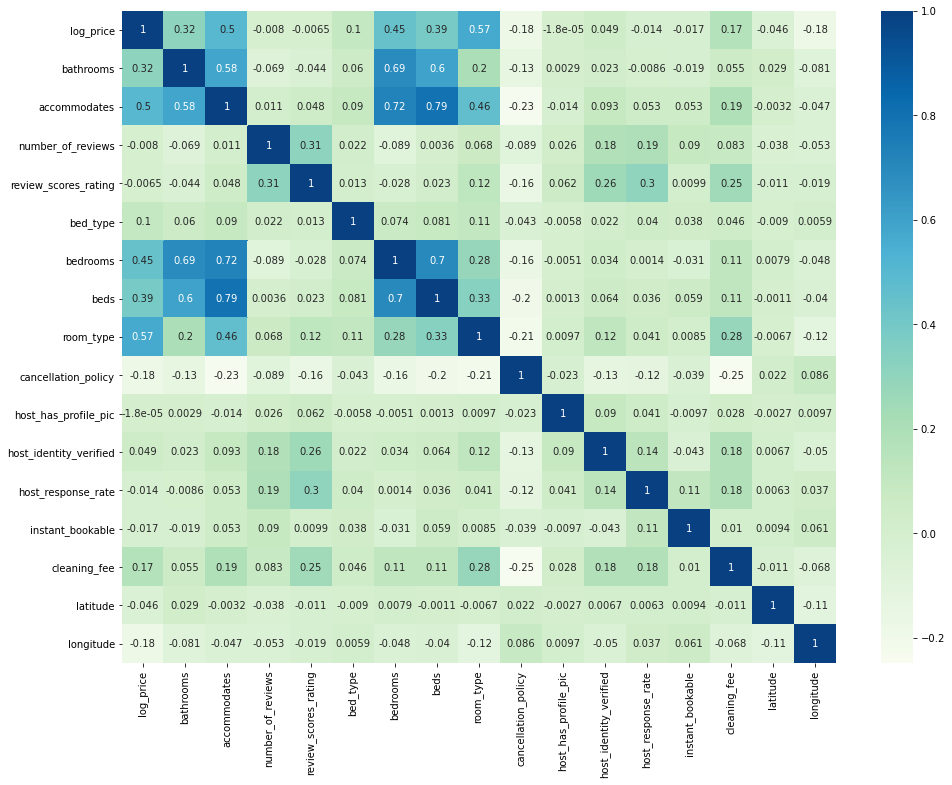

In [45]:
#Correlation Heatmap
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
sns.heatmap(la_h.corr(),cmap='GnBu',annot=True)

#sns.heatmap(uniform_data)

In [46]:
la_h

,log_price,bathrooms,accommodates,number_of_reviews,review_scores_rating,bed_type,bedrooms,beds,room_type,cancellation_policy,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,cleaning_fee,latitude,longitude
6,0.0,1.0,3,15,97.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,33.980454,-118.462821
7,1.0,1.0,2,9,93.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,34.046737,-118.260439
9,0.0,1.0,2,2,90.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,33.992563,-117.895997
11,1.0,1.5,4,29,97.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1,33.875862,-118.403293
12,0.0,1.0,2,0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1,33.813228,-118.389434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74101,0.0,1.0,1,4,90.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1,34.020021,-118.498239
74102,0.0,3.0,10,1,80.0,1.0,1.0,10.0,0.0,1.0,1.0,0.0,1.0,0.0,0,34.199671,-118.618070
74105,0.0,1.0,2,36,91.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1,34.092640,-118.343921
74107,1.0,2.0,4,16,93.0,1.0,2.0,4.0,1.0,1.0,1.0,0.0,1.0,0.0,1,33.871549,-118.396053


In [47]:
corr = la_h.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = la_h.columns[columns]
la_h = la_h[selected_columns]

selected_columns = selected_columns[1:].values

In [48]:
#Adding constant column of ones, mandatory for sm.Logit model
X = la_h.drop("log_price",1)   #Feature Matrix
y = la_h["log_price"]          #Target Variable

X_1 = sm.add_constant(X)
#Fitting sm.Logit model
model = sm.Logit(y,X_1).fit()
model.pvalues

Optimization terminated successfully.
         Current function value: 0.408691
         Iterations 8


const                      1.335362e-83
bathrooms                  3.024743e-08
accommodates               7.263518e-66
number_of_reviews          6.853702e-01
review_scores_rating       1.825153e-28
bed_type                   3.910777e-06
bedrooms                  1.484781e-155
beds                       4.589262e-06
room_type                  0.000000e+00
cancellation_policy        8.258378e-04
host_has_profile_pic       4.055335e-01
host_identity_verified     1.092826e-02
host_response_rate         2.013078e-03
instant_bookable           3.471364e-05
cleaning_fee               7.443515e-01
latitude                   1.568505e-28
longitude                 1.077231e-124
dtype: float64

# Backward Elimination

In [49]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.Logit(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

Optimization terminated successfully.
         Current function value: 0.408691
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.408694
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.408697
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.408713
         Iterations 8
['bathrooms', 'accommodates', 'review_scores_rating', 'bed_type', 'bedrooms', 'beds', 'room_type', 'cancellation_policy', 'host_identity_verified', 'host_response_rate', 'instant_bookable', 'latitude', 'longitude']


In [50]:
la_d= pd.DataFrame(la_h,columns=['log_price','bathrooms', 'accommodates', 'review_scores_rating', 'bed_type', 'bedrooms', 'beds', 'room_type', 'cancellation_policy', 'host_identity_verified', 'host_response_rate', 'instant_bookable', 'latitude', 'longitude'])
                         

## Logistic Regression

In [51]:
#logisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [52]:
# Splitting data to X and y
#Categorize room type
LALR = la_d.copy()
X2_lr = LALR.drop(['log_price'], axis=1)
y2_lr = LALR.log_price

# Splitting data to train and test
from sklearn.model_selection import train_test_split
X2_la_LRtrain, X2_la_LRtest, y2_la_LRtrain, y2_la_LRtest = train_test_split(X2_lr,y2_lr,train_size=0.7,random_state=1234)

In [53]:
#regression result
logreg = LogisticRegression()
logreg.fit(X2_la_LRtrain, y2_la_LRtrain)
est = sm.Logit(y2_la_LRtrain, X2_la_LRtrain.astype(float)).fit()
print(est.summary())


Optimization terminated successfully.
         Current function value: 0.420173
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              log_price   No. Observations:                15717
Model:                          Logit   Df Residuals:                    15704
Method:                           MLE   Df Model:                           12
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                  0.3899
Time:                        16:32:54   Log-Likelihood:                -6603.9
converged:                       True   LL-Null:                       -10825.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
bathrooms                  0.2302      0.048      4.819      0.000       0.137      

Accuracy of logistic regression  classifier on test set: 0.81
Confusion Matrix
[[3066  663]
 [ 616 2391]]
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      3729
         1.0       0.78      0.80      0.79      3007

    accuracy                           0.81      6736
   macro avg       0.81      0.81      0.81      6736
weighted avg       0.81      0.81      0.81      6736



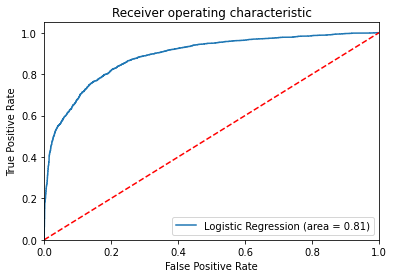

In [54]:
#accuracy
y_predition = logreg.predict(X2_la_LRtest)
print('Accuracy of logistic regression  classifier on test set: {:.2f}'.format(logreg.score(X2_la_LRtest, y2_la_LRtest)))
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y2_la_LRtest, y_predition)
print('Confusion Matrix')
print(confusion_matrix)

#report
print(classification_report(y2_la_LRtest, y_predition))

#ROC
logit_roc_auc = roc_auc_score(y2_la_LRtest, logreg.predict(X2_la_LRtest))
fpr, tpr, thresholds = roc_curve(y2_la_LRtest, logreg.predict_proba(X2_la_LRtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [55]:
#K-fold validation

score6 = cross_val_score(logreg, X2_lr, y2_lr, cv=kfold, scoring='accuracy')
print("Results of 10-fold validation:",score6)
print()
print("Mean of 10-fold validation:", score6.mean())

Results of 10-fold validation: [0.81121995 0.81255565 0.80008905 0.81069042 0.80489978 0.80489978
 0.80712695 0.79109131 0.81737194 0.79955457]

Mean of 10-fold validation: 0.8059499392138857


In [56]:
#remove host_identity
la_d1= pd.DataFrame(la_h,columns=['log_price','bathrooms', 'accommodates', 'review_scores_rating', 'bed_type', 'bedrooms', 'beds', 'room_type', 'cancellation_policy', 'host_response_rate', 'instant_bookable', 'latitude', 'longitude'])
                   

In [57]:
# Splitting data to X and y
#Categorize room type
LALR1 = la_d1.copy()
X2_lr1 = LALR1.drop(['log_price'], axis=1)
y2_lr1 = LALR1.log_price

# Splitting data to train and test
from sklearn.model_selection import train_test_split
X2_la_LRtrain1, X2_la_LRtest1, y2_la_LRtrain1, y2_la_LRtest1 = train_test_split(X2_lr1,y2_lr1,train_size=0.7,random_state=1234)



In [58]:
#regression result
logreg = LogisticRegression()
logreg.fit(X2_la_LRtrain1, y2_la_LRtrain1)
est_2 = sm.Logit(y2_la_LRtrain1, X2_la_LRtrain1.astype(float)).fit()
print(est_2.summary())

Optimization terminated successfully.
         Current function value: 0.420243
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              log_price   No. Observations:                15717
Model:                          Logit   Df Residuals:                    15705
Method:                           MLE   Df Model:                           11
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                  0.3898
Time:                        16:32:56   Log-Likelihood:                -6605.0
converged:                       True   LL-Null:                       -10825.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
bathrooms                0.2305      0.048      4.826      0.000       0.137       0.324

Accuracy of logistic regression  classifier on test set: 0.81
Confusion Matrix
[[3077  652]
 [ 610 2397]]
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      3729
         1.0       0.79      0.80      0.79      3007

    accuracy                           0.81      6736
   macro avg       0.81      0.81      0.81      6736
weighted avg       0.81      0.81      0.81      6736



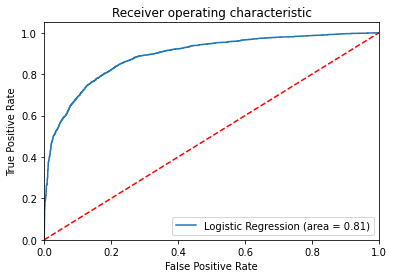

In [59]:
#accuracy
y_predition1 = logreg.predict(X2_la_LRtest1)
print('Accuracy of logistic regression  classifier on test set: {:.2f}'.format(logreg.score(X2_la_LRtest1, y2_la_LRtest1)))
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_2 = confusion_matrix(y2_la_LRtest1, y_predition1)
print('Confusion Matrix')
print(confusion_matrix_2)

#report
print(classification_report(y2_la_LRtest1, y_predition1))

#ROC
logit_roc_auc_2 = roc_auc_score(y2_la_LRtest1, logreg.predict(X2_la_LRtest1))
fpr, tpr, thresholds = roc_curve(y2_la_LRtest1, logreg.predict_proba(X2_la_LRtest1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [60]:
#K-fold validation

score7 = cross_val_score(logreg, X2_lr1, y2_lr1, cv=kfold, scoring='accuracy')
print("Results of 10-fold validation:",score7)
print()
print("Mean of 10-fold validation:", score7.mean())

Results of 10-fold validation: [0.81700801 0.809439   0.80097952 0.81870824 0.80623608 0.81024499
 0.8        0.80935412 0.8013363  0.79910913]

Mean of 10-fold validation: 0.8072415400206653


## Naive Bayes

In [61]:
#Naive Bayes
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [62]:
lanb = la_d.copy()

In [63]:
lanb.loc[lanb["accommodates"] <3.41,"accommodates"] = 0
lanb.loc[lanb["accommodates"] >=3.41,"accommodates"] = 1

lanb.loc[lanb["bathrooms"] <1.33,"bathrooms"] = 0
lanb.loc[lanb["bathrooms"] >=1.33,"bathrooms"] = 1

lanb.loc[lanb["review_scores_rating"] <72.18,"review_scores_rating"] = 0
lanb.loc[lanb["review_scores_rating"] >=72.18,"review_scores_rating"] = 1

lanb.loc[lanb["bedrooms"] <1.33,"bedrooms"] = 0
lanb.loc[lanb["bedrooms"] >=1.33,"bedrooms"] = 1

lanb.loc[lanb["beds"] <1.86,"beds"] = 0
lanb.loc[lanb["beds"] >=1.86,"beds"] = 1

lanb.loc[lanb["latitude"] <34.06,"latitude"] = 0
lanb.loc[lanb["latitude"] >=34.06,"latitude"] = 1

lanb.loc[abs(lanb["longitude"]) < abs(lanb.longitude.mean()),"longitude"] = 0
lanb.loc[abs(lanb["longitude"]) >= abs(lanb.longitude.mean()),"longitude"] = 1

# lanb.loc[lanb["longitude"] < -118.33,"longitude"] = 0
# lanb.loc[lanb["longitude"] >= -118.33,"longitude"] = 1

In [64]:
lanb.longitude.value_counts()

1.0    12763
0.0     9690
Name: longitude, dtype: int64

In [65]:
# %matplotlib qt
%matplotlib inline

<AxesSubplot:>

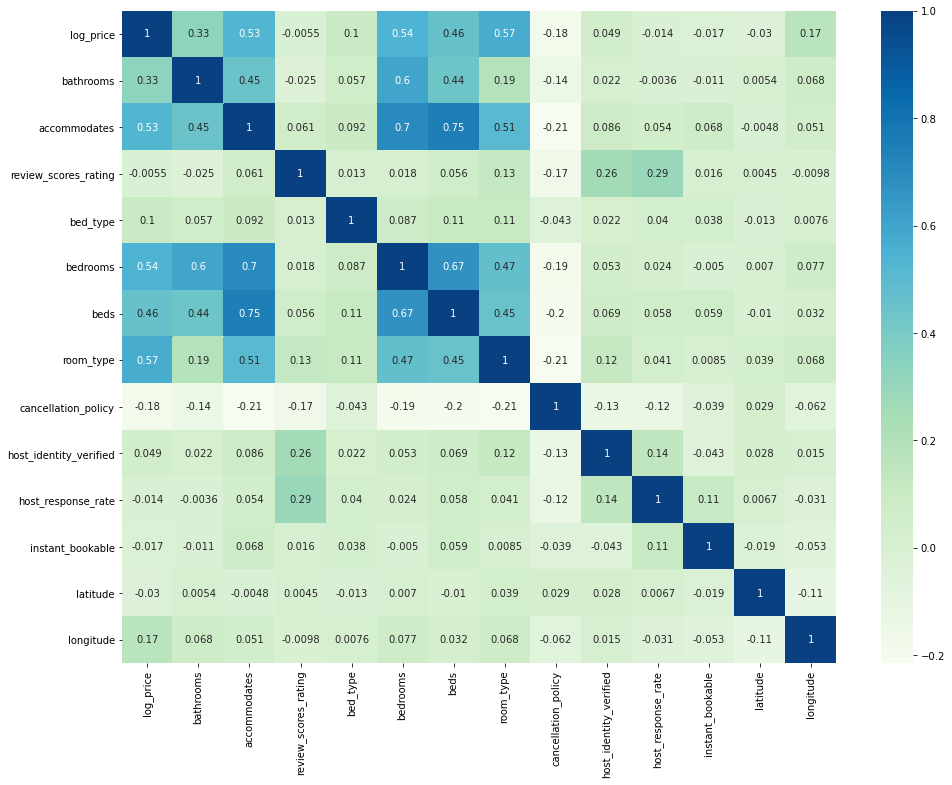

In [66]:
#Correlation Heatmap
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
sns.heatmap(lanb.corr(),cmap='GnBu',annot=True)

In [67]:
#Adding constant column of ones, mandatory for sm.Logit model
Xnb = lanb.drop("log_price",1)   #Feature Matrix
ynb= lanb["log_price"]          #Target Variable
import statsmodels.api as sm
Xnb_1 = sm.add_constant(Xnb)
#Fitting sm.OLS model
modelnb = sm.Logit(ynb,Xnb_1).fit()
modelnb.pvalues

Optimization terminated successfully.
         Current function value: 0.419143
         Iterations 7


const                     7.274772e-77
bathrooms                 9.093068e-24
accommodates              7.515257e-52
review_scores_rating      1.632961e-30
bed_type                  1.621938e-07
bedrooms                  2.316622e-95
beds                      8.189167e-02
room_type                 0.000000e+00
cancellation_policy       6.149791e-05
host_identity_verified    1.953665e-01
host_response_rate        2.175423e-05
instant_bookable          8.255983e-08
latitude                  8.716424e-10
longitude                 1.762984e-99
dtype: float64

In [68]:
#Backward Elimination
cols1 = list(Xnb.columns)
pmax1 = 1
while (len(cols1)>0):
    p1= []
    Xnb_1 = Xnb[cols1]
    Xnb_1 = sm.add_constant(Xnb_1)
    modelnb = sm.Logit(ynb,Xnb_1).fit()
    p1 = pd.Series(modelnb.pvalues.values[1:],index = cols1)      
    pmax1 = max(p1)
    feature_with_p1_max = p1.idxmax()
    if(pmax1>0.05):
        cols1.remove(feature_with_p1_max)
    else:
        break
selected_features_BEnb = cols1
print(selected_features_BEnb)

Optimization terminated successfully.
         Current function value: 0.419143
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.419181
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.419248
         Iterations 7
['bathrooms', 'accommodates', 'review_scores_rating', 'bed_type', 'bedrooms', 'room_type', 'cancellation_policy', 'host_response_rate', 'instant_bookable', 'latitude', 'longitude']


In [69]:
X_feature=pd.DataFrame(lanb,columns=selected_features_BEnb).values
x_target=lanb.log_price.values
X_feature

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.]])

accuracy score: 0.7871140142517815
[[3293  404]
 [1030 2009]]
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82      3697
         1.0       0.83      0.66      0.74      3039

    accuracy                           0.79      6736
   macro avg       0.80      0.78      0.78      6736
weighted avg       0.79      0.79      0.78      6736



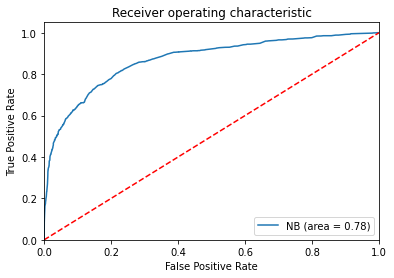

In [70]:
#standarlize Xfeature
#scaler = StandardScaler() 
#scaler.fit(X_feature)  
#x_feature= scaler.transform(X_feature)   
feature_train, feature_test, target_train, target_test = train_test_split(X_feature, x_target, test_size=0.3,random_state=0)

NB=BernoulliNB()
NB.fit(feature_train,target_train)
predict_results=NB.predict(feature_test)
print("accuracy score:", accuracy_score(predict_results, target_test))

conf_mat = confusion_matrix(target_test, predict_results)
print(conf_mat)

print(classification_report(target_test, predict_results))
#ROC
nb_roc_auc = roc_auc_score(target_test, NB.predict(feature_test))
fpr, tpr, thresholds = roc_curve(target_test, NB.predict_proba(feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

In [71]:
#K-fold validation

score8 = cross_val_score(NB, Xnb, ynb, cv=kfold, scoring='accuracy')
print("Results of 10-fold validation:",score8)
print()
print("Mean of 10-fold validation:", score8.mean())

Results of 10-fold validation: [0.79385574 0.77916296 0.79118433 0.76971047 0.77728285 0.79420935
 0.77951002 0.78262806 0.77594655 0.79287305]

Mean of 10-fold validation: 0.7836363383952069


## Random Forest

In [72]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
larf = la_d.copy()
X2 = larf.drop(['log_price'], axis=1)
y2 = larf.log_price
# Splitting data to train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,train_size=0.7,random_state=1234)

In [73]:
forest = RandomForestClassifier(n_estimators = 10, random_state = 0, max_depth=4)
Random_Forest= forest.fit(X2_train,y2_train)
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(forest, X2_train, y2_train, cv=10))) 
rfpred = forest.predict(X2_test)
#random forest cross validation score

0.8090610589841642


[Text(558.0, 978.48, 'room_type <= 0.5\ngini = 0.496\nsamples = 9956\nvalue = [8545, 7172]'),
 Text(279.0, 761.0400000000001, 'latitude <= 34.173\ngini = 0.215\nsamples = 4157\nvalue = [5738, 800]'),
 Text(139.5, 543.6, 'review_scores_rating <= 25.0\ngini = 0.225\nsamples = 3771\nvalue = [5159, 766]'),
 Text(69.75, 326.1600000000001, 'latitude <= 34.065\ngini = 0.345\nsamples = 1129\nvalue = [1400, 399]'),
 Text(34.875, 108.72000000000003, 'gini = 0.308\nsamples = 626\nvalue = [804, 189]'),
 Text(104.625, 108.72000000000003, 'gini = 0.385\nsamples = 503\nvalue = [596, 210]'),
 Text(209.25, 326.1600000000001, 'longitude <= -118.467\ngini = 0.162\nsamples = 2642\nvalue = [3759, 367]'),
 Text(174.375, 108.72000000000003, 'gini = 0.42\nsamples = 233\nvalue = [245, 105]'),
 Text(244.125, 108.72000000000003, 'gini = 0.129\nsamples = 2409\nvalue = [3514, 262]'),
 Text(418.5, 543.6, 'accommodates <= 8.0\ngini = 0.105\nsamples = 386\nvalue = [579, 34]'),
 Text(348.75, 326.1600000000001, 'host_r

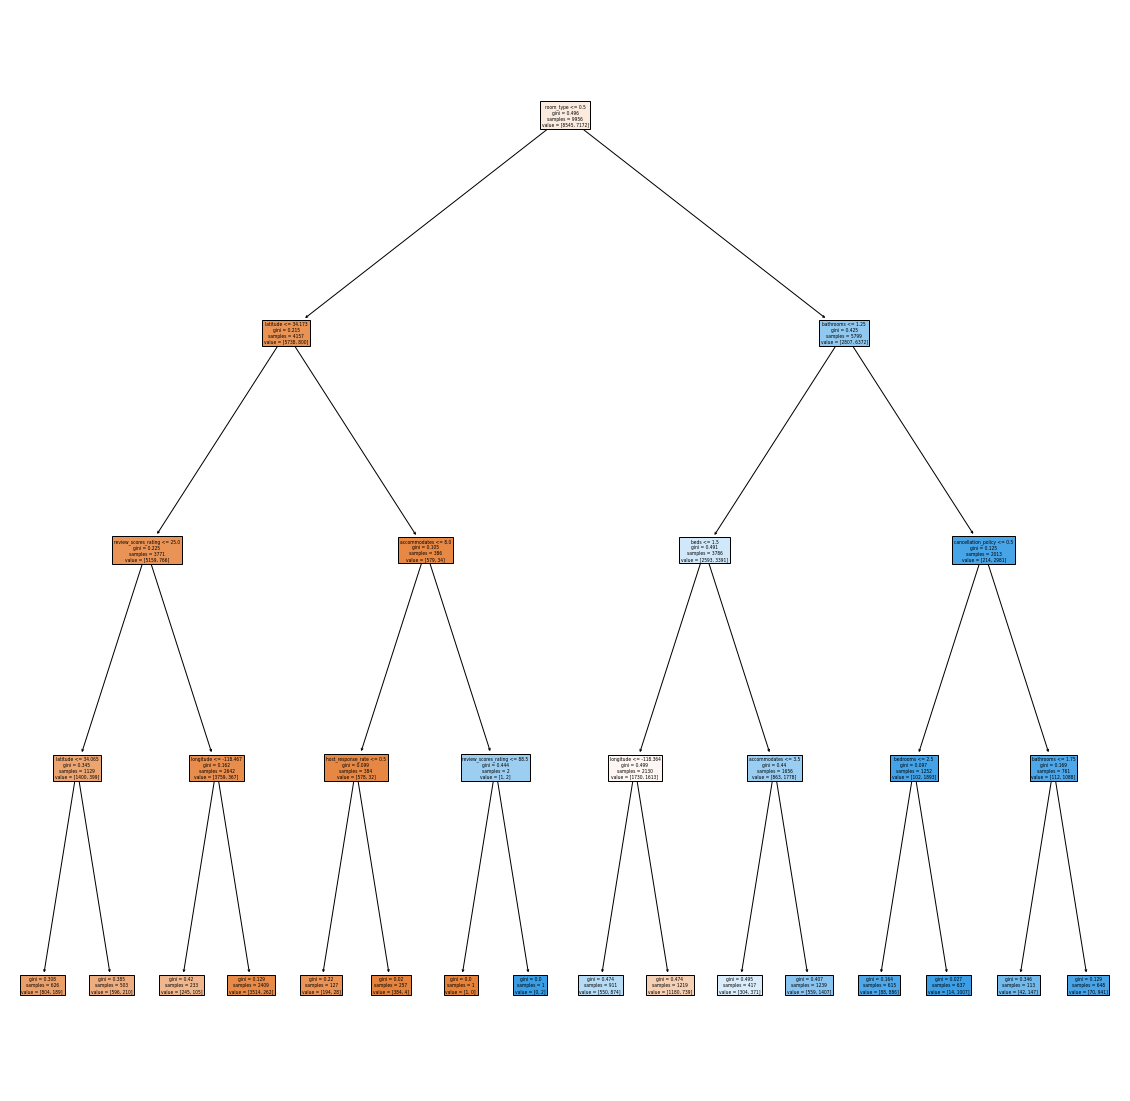

In [74]:
#Random Forest 
fig = plt.figure(figsize =(20,20))
tree.plot_tree(Random_Forest.estimators_[1], feature_names=list(X2),filled=True)

accuracy score: 0.8173990498812351
[[3221  508]
 [ 722 2285]]
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      3729
         1.0       0.82      0.76      0.79      3007

    accuracy                           0.82      6736
   macro avg       0.82      0.81      0.81      6736
weighted avg       0.82      0.82      0.82      6736



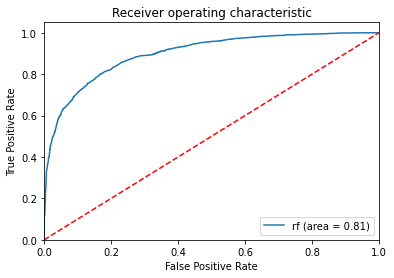

In [75]:
#X2_train, X2_test, y2_train, y2_test rfpred
print("accuracy score:", accuracy_score(rfpred, y2_test))

conf_matrf = confusion_matrix(y2_test, rfpred)
print(conf_matrf)

print(classification_report(y2_test, rfpred))

#ROC
rf_roc_auc = roc_auc_score(y2_test, forest.predict(X2_test))
fpr, tpr, thresholds = roc_curve(y2_test, forest.predict_proba(X2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='rf (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [76]:
#K-fold validation

score9 = cross_val_score(forest, X2, y2, cv=kfold, scoring='accuracy')
print("Results of 10-fold validation:",score9)
print()
print("Mean of 10-fold validation:", score9.mean())

Results of 10-fold validation: [0.80142476 0.80721282 0.81522707 0.80801782 0.8        0.83073497
 0.81469933 0.81915367 0.80534521 0.80222717]

Mean of 10-fold validation: 0.8104042821982956


## KNN

In [77]:
#import packages
#from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler() 
scaler.fit(X2_lr)  
x_feature1 = scaler.transform(X2_lr)   
kfeature1_train, kfeature1_test, ktarget1_train, ktarget1_test = train_test_split(X2_lr, y2_lr, test_size=0.3,random_state=0)

In [79]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(kfeature1_train,ktarget1_train)

knn_grid.best_params_, knn_grid.best_score_


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    7.9s finished


({'knn__n_neighbors': 9}, 0.8182223269286973)

In [80]:
#feature_train, feature_test, target_train, target_test 
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(kfeature1_train,ktarget1_train)
knn_pred = knn.predict(kfeature1_test)
print(knn_pred)

[0. 0. 1. ... 1. 1. 0.]


accuracy score: 0.7850356294536817
[[3053  644]
 [ 804 2235]]
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      3697
         1.0       0.78      0.74      0.76      3039

    accuracy                           0.79      6736
   macro avg       0.78      0.78      0.78      6736
weighted avg       0.78      0.79      0.78      6736



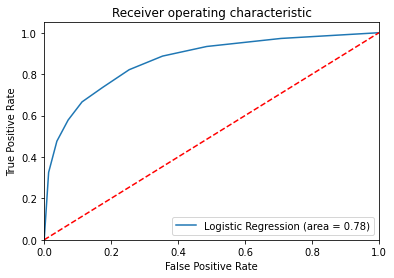

In [81]:

print("accuracy score:", accuracy_score(knn_pred, ktarget1_test))

conf_matknn = confusion_matrix(ktarget1_test, knn_pred)
print(conf_matknn)

print(classification_report(ktarget1_test, knn_pred))

#feature_train, feature_test, target_train, target_test 
#ROC
knn_roc_auc = roc_auc_score(ktarget1_test , knn.predict(kfeature1_test))
fpr, tpr, thresholds = roc_curve(ktarget1_test, knn.predict_proba(kfeature1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('knn_ROC')
plt.show()

In [82]:
#K-fold validation

score10 = cross_val_score(knn, X2_lr, y2_lr, cv=kfold, scoring='accuracy')
print("Results of 10-fold validation:",score10)
print()
print("Mean of 10-fold validation:", score10.mean())

Results of 10-fold validation: [0.78984862 0.79786287 0.77871772 0.79688196 0.80935412 0.80534521
 0.78797327 0.80400891 0.79599109 0.80445434]

Mean of 10-fold validation: 0.7970438116165932


In [83]:
#class distribution of log_price
raw_la.log_price.value_counts()/len(raw_la)

0.0    0.548924
1.0    0.451076
Name: log_price, dtype: float64

## Thank you!